In [1]:
from citipy import citipy
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
from api_keys import weather_api_key
import random
from datetime import datetime
import scipy.stats as sts

In [2]:
range_lat = (-90.00, 90.00)
range_lng = (-180.00, 180.00)

city_dict = {}

# random.seed(0)

i = 1
ran_length = random.randint(500,600)

while len(city_dict) < ran_length: # change this after script completion for ran_length
    rand_lat = round(random.uniform(range_lat[0], range_lat[1]), 2)
    rand_lng = round(random.uniform(range_lng[0], range_lng[1]), 2)
    
    city = citipy.nearest_city(rand_lat, rand_lng)
    
    if city.city_name in city_dict:
        pass
    else:
        city_dict[city.city_name] = (i, city.country_code, rand_lat, rand_lng)
        i += 1    

# city_dict

In [3]:
url_base = "http://api.openweathermap.org/data/2.5/weather?"

weather_dict = {}

city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date_unix = []
date = []
city_na = []
for key in city_dict:
    
    url_query = f"{url_base}q={key}&appid={weather_api_key}&units=metric"
    
    request = requests.get(url_query)
    weather_dict[key] = (request.json())
    
    try:
        city.append(weather_dict[key]["name"])
        lat.append(float(weather_dict[key]["coord"]["lat"]))
        lng.append(float(weather_dict[key]["coord"]["lon"]))
        max_temp.append(float(weather_dict[key]["main"]["temp_max"]))
        humidity.append(float(weather_dict[key]["main"]["humidity"]))
        cloudiness.append(int(weather_dict[key]["clouds"]["all"]))
        wind_speed.append(float(weather_dict[key]["wind"]["speed"]))
        country.append(weather_dict[key]["sys"]["country"])
        date_unix.append(int(weather_dict[key]["dt"]))
        date.append(datetime.utcfromtimestamp(int(weather_dict[key]["dt"])).strftime('%Y-%m-%d %H:%M:%S'))
        print(f"Request {str(city_dict[key][0]).rjust(3, '0')} of {len(city_dict)} | AVAILABLE:     COMPLETE [{request}] ---> {key}")
        
    except KeyError:
        city_na.append(key)
        print(f"Request {str(city_dict[key][0]).rjust(3, '0')} of {len(city_dict)} | NOT AVAILABLE: COMPLETE [{request}] ---> {key}")

Request 001 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> busselton
Request 002 of 581 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> illoqqortoormiut
Request 003 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ushuaia
Request 004 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kruisfontein
Request 005 of 581 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> ye
Request 006 of 581 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> tsihombe
Request 007 of 581 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> sentyabrskiy
Request 008 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ponta do sol
Request 009 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> cavalcante
Request 010 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> otane
Request 011 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> rikitea
Request 012 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> qaanaaq
Request 013 of 581 | AVAILABLE:     COMPLETE [<Respon

Request 106 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> albany
Request 107 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> hilo
Request 108 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> tura
Request 109 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> geraldton
Request 110 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> yibin
Request 111 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> sydney
Request 112 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> saint anthony
Request 113 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> puerto ayora
Request 114 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> amapa
Request 115 of 581 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> vaitupu
Request 116 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> vallenar
Request 117 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> channel-port aux basques
Request 118 of 581 | AVAILABLE:     COMPLETE [<Response [

Request 211 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> upernavik
Request 212 of 581 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> barentsburg
Request 213 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> isangel
Request 214 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> cap malheureux
Request 215 of 581 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> attawapiskat
Request 216 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> comodoro rivadavia
Request 217 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> muisne
Request 218 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> yar-sale
Request 219 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> boende
Request 220 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> torbay
Request 221 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> mandalgovi
Request 222 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> vila velha
Request 223 of 581 | AVAILABLE:     COMPLET

Request 316 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> taksimo
Request 317 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> seymchan
Request 318 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> srednekolymsk
Request 319 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> weymouth
Request 320 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> lima
Request 321 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> iqaluit
Request 322 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> totma
Request 323 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> rameswaram
Request 324 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> doha
Request 325 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> nioki
Request 326 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> banda aceh
Request 327 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> karratha
Request 328 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ch

Request 422 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> lorengau
Request 423 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> uddevalla
Request 424 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ormara
Request 425 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> rundu
Request 426 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> shimoda
Request 427 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> narathiwat
Request 428 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> revda
Request 429 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> point pleasant
Request 430 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> urumqi
Request 431 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> corn island
Request 432 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> victoria
Request 433 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> yanam
Request 434 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] --

Request 527 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> abu dhabi
Request 528 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> bath
Request 529 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> okhotsk
Request 530 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> srandakan
Request 531 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> bull savanna
Request 532 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> marzuq
Request 533 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> khandyga
Request 534 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> bosobolo
Request 535 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> simi
Request 536 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> biltine
Request 537 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kununurra
Request 538 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] ---> svetlogorsk
Request 539 of 581 | AVAILABLE:     COMPLETE [<Response [200]>] --

In [4]:
# Cities not found in OpenWeatherAPI
len_cities_na = len(city_na)

if len_cities_na == 0:
    print(f"All cities found in the OpenWeather database")
else:
    if len_cities_na == 1:
        print(f"The following city was not found in the OpenWeather database:\n")
    else:
        print(f"The following {len_cities_na} cities were not found in the OpenWeather database:\n")
    for index, element in enumerate(city_na):
        print(f"{index+1}.- {element}")

The following 40 cities were not found in the OpenWeather database:

1.- illoqqortoormiut
2.- ye
3.- tsihombe
4.- sentyabrskiy
5.- dzhusaly
6.- grand river south east
7.- saleaula
8.- galchino
9.- tapanatepec
10.- taolanaro
11.- vaitupu
12.- belushya guba
13.- amderma
14.- nikolskoye-na-cheremshane
15.- x-can
16.- nizhneyansk
17.- mys shmidta
18.- aflu
19.- palabuhanratu
20.- ruatoria
21.- bo
22.- turtkul
23.- barentsburg
24.- attawapiskat
25.- ozgon
26.- karaul
27.- bolshegrivskoye
28.- deshna
29.- yanchukan
30.- wulanhaote
31.- temaraia
32.- umzimvubu
33.- astipalaia
34.- doctor pedro p. pena
35.- tumannyy
36.- louisbourg
37.- marcona
38.- tabiauea
39.- samusu
40.- formoso do araguaia


In [5]:
city_df = pd.DataFrame({
    "City": city,
    "Latitude": lat,
    "Longitude": lng,
    "Max. Temperature (C)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (m/s)": wind_speed,
    "Country": country,
    "Date (unix-UTC)": date_unix,
    "Date": date
})

study_date = city_df["Date"][0][0:10]

# Saving the df as a csv
city_df.to_csv("Data/city_df.csv", encoding = "utf-8", index = False)
city_df

,City,Latitude,Longitude,Max. Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date (unix-UTC),Date
0,Busselton,-33.6500,115.3333,23.91,58.0,99,3.35,AU,1635042962,2021-10-24 02:36:02
1,Ushuaia,-54.8000,-68.3000,0.81,86.0,75,5.66,AR,1635042963,2021-10-24 02:36:03
2,Kruisfontein,-34.0033,24.7314,9.95,79.0,6,3.58,ZA,1635042964,2021-10-24 02:36:04
3,Ponta do Sol,32.6667,-17.1000,21.35,64.0,15,2.71,PT,1635042967,2021-10-24 02:36:07
4,Cavalcante,-13.7975,-47.4583,23.74,72.0,100,1.08,BR,1635042968,2021-10-24 02:36:08
...,...,...,...,...,...,...,...,...,...,...
536,Sūsangerd,31.5608,48.1831,16.01,22.0,0,2.68,IR,1635043534,2021-10-24 02:45:34
537,Jaora,23.6333,75.1333,21.99,71.0,0,2.82,IN,1635043536,2021-10-24 02:45:36
538,Aklavik,68.2191,-135.0107,-1.54,95.0,82,1.38,CA,1635043536,2021-10-24 02:45:36
539,Ust-Nera,64.5667,143.2000,-13.81,93.0,87,2.44,RU,1635043538,2021-10-24 02:45:38


In [6]:
# Statistics of the DataFrame
summary_sts = city_df.describe()
summary_sts


,Latitude,Longitude,Max. Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Date (unix-UTC)
count,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,5.410000e+02
mean,19.283540,17.998672,15.757357,72.519409,52.96488,3.241959,1.635043e+09
std,32.766427,91.149722,11.403701,19.629770,39.40921,2.363963,1.931206e+02
min,-54.800000,-175.200000,-22.740000,10.000000,0.00000,0.000000,1.635042e+09
25%,-7.938600,-66.382100,8.290000,63.000000,12.00000,1.460000,1.635043e+09
50%,21.150000,24.065300,17.810000,77.000000,55.00000,2.710000,1.635043e+09
75%,46.680600,101.383300,24.930000,87.000000,94.00000,4.620000,1.635043e+09
max,78.218600,178.416700,37.030000,100.000000,100.00000,14.260000,1.635044e+09


In [7]:
# Removing cities where the humidity > 100%

if len(city_df["City"][city_df["Humidity (%)"] > 100]) != 0:
    print(f"The following city/cities was/were removed:\n")
    print(city_df["City"][city_df["Humidity (%)"] > 100])
    city_df = city_df.drop(city_df[city_df["Humidity (%)"] > 100].index).reset_index(drop = True)
else:
    print("Humidity inpsection successfully passed.")


Humidity inpsection successfully passed.


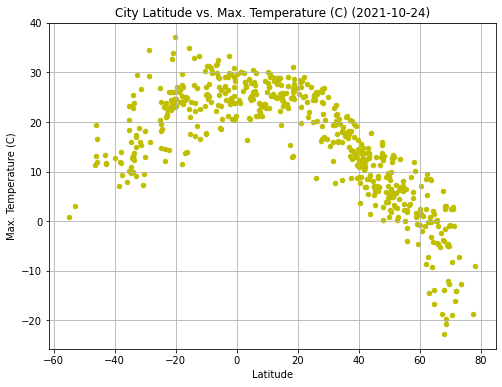

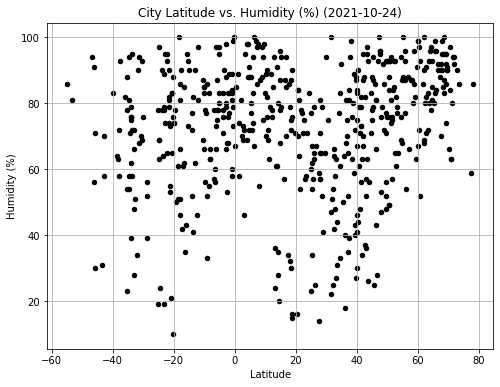

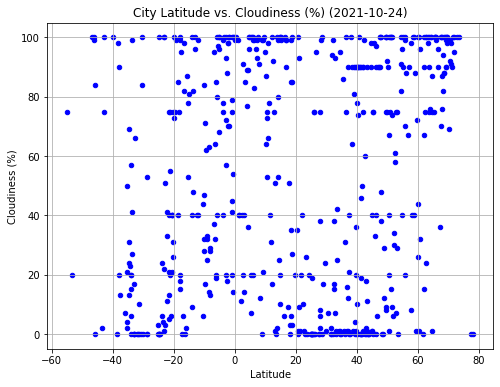

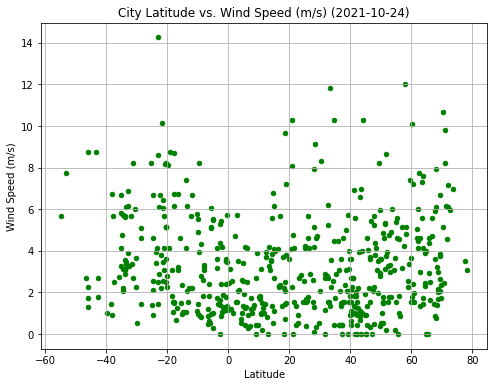

In [8]:
plot_labels = ["Max. Temperature (C)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (m/s)"]
for_figures = ["MaxTemp", "Humidity", "Cloudiness", "WindSpeed"]
colours = ["y", "k", "b", "g"]

for i, label in enumerate(plot_labels):
    city_df.plot.scatter(x = "Latitude", y = label, c = colours[i], title = f"City Latitude vs. {label} ({study_date})", figsize = (8, 6),  grid = True)
    name_fig = f"Figures/Latitude_{for_figures[i]}.png"
    plt.savefig(name_fig, bbox_inches='tight', dpi = 100)
    plt.show()

# Description of the 4 plots here

In [9]:
# Separating cities by their locations either in the Northern Hemisphere (>= 0 degrees latitude) or
# Southern Hemisphere (< 0 degrees latitude)

city_df_NH = city_df[city_df["Latitude"] >= 0].reset_index(drop = True).copy()
city_df_SH = city_df[city_df["Latitude"] < 0].reset_index(drop = True).copy()

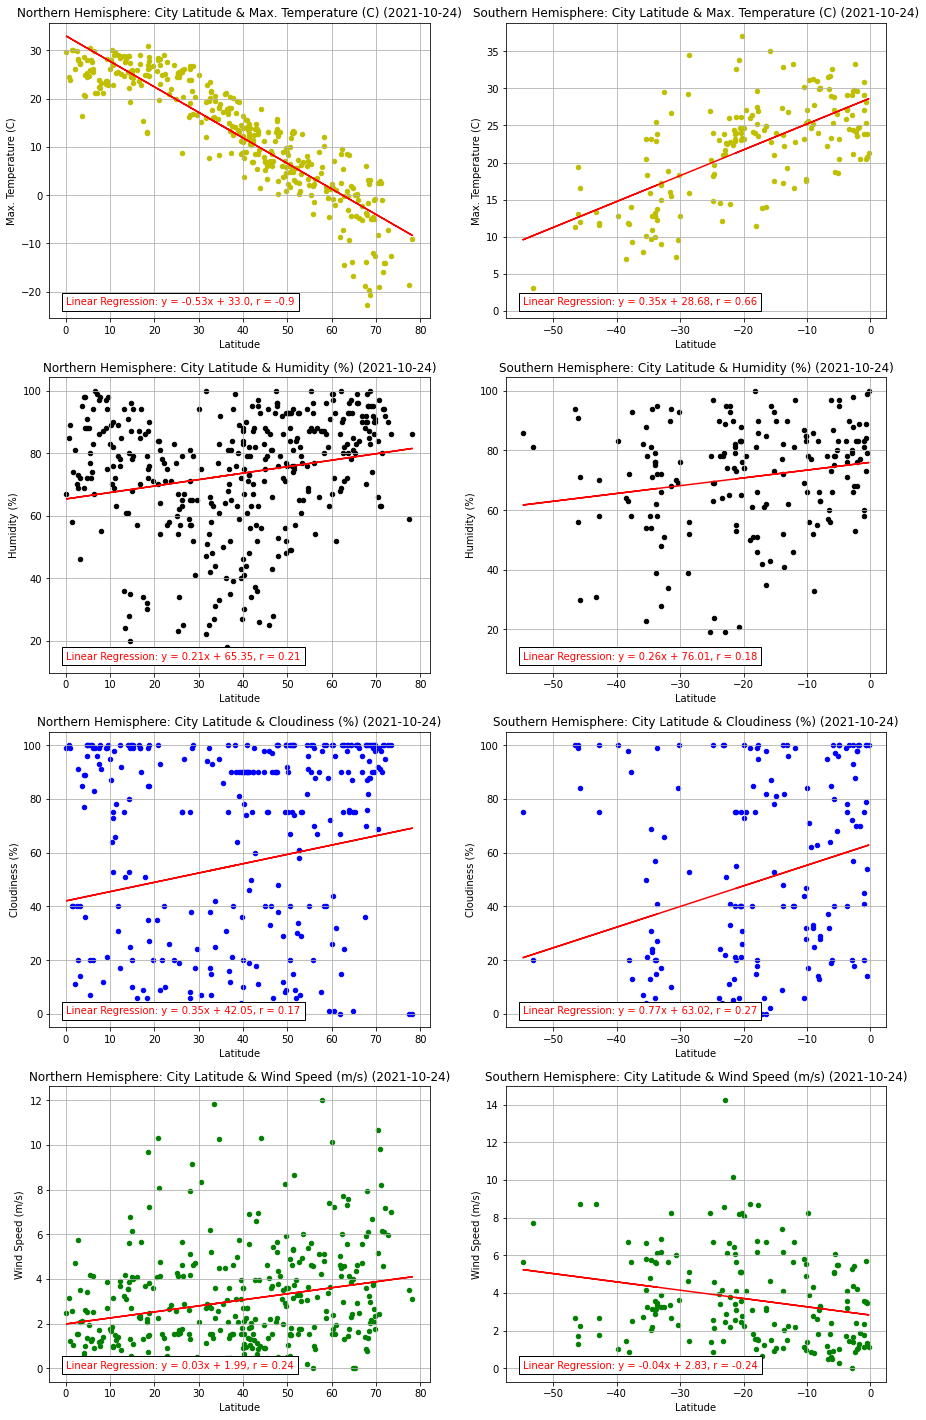

In [10]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(15,25))

slope_NH = []
intercept_NH = []
rvalue_NH = []
pvalue_NH = []
stderr_NH = []
regress_values_NH = []
slope_SH = []
intercept_SH = []
rvalue_SH = []
pvalue_SH = []
stderr_SH = []
regress_values_SH = []

for i, label in enumerate(plot_labels):
    
#     Performing linear regression for the Northern Hemisphere and storing the values in lists
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(city_df_NH["Latitude"], city_df_NH[label])
    slope_NH.append(slope)
    intercept_NH.append(intercept)
    rvalue_NH.append(rvalue)
    pvalue_NH.append(pvalue)
    stderr_NH.append(stderr)
    
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    r_val = f"r = {round(rvalue,2)}"
    regress_values = city_df_NH["Latitude"] * slope + intercept
    regress_values_NH.append(regress_values)
    
    city_df_NH.plot.scatter(ax = axes[i, 0], x = "Latitude", y = label, c = colours[i], title = f"Northern Hemisphere: City Latitude & {label} ({study_date})", grid = True)
    axes[i,0].plot(city_df_NH["Latitude"],regress_values,"r-")
    axes[i,0].annotate(f"Linear Regression: {line_eq}, {r_val}", (city_df_NH["Latitude"].min(), city_df_NH[label].min()), fontsize=10,color="r", bbox=dict(facecolor='white', edgecolor='k'))
    
#     Performing linear regression for the Southern Hemisphere and storing the values in lists
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(city_df_SH["Latitude"], city_df_SH[label])
    slope_SH.append(slope)
    intercept_SH.append(intercept)
    rvalue_SH.append(rvalue)
    pvalue_SH.append(pvalue)
    stderr_SH.append(stderr)
    
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    r_val = f"r = {round(rvalue,2)}"
    regress_values = city_df_SH["Latitude"] * slope + intercept
    regress_values_SH.append(regress_values)
    
    city_df_SH.plot.scatter(ax = axes[i, 1], x = "Latitude", y = label, c = colours[i], title = f"Southern Hemisphere: City Latitude & {label} ({study_date})", grid = True)
    axes[i,1].plot(city_df_SH["Latitude"],regress_values,"r-")
    axes[i,1].annotate(f"Linear Regression: {line_eq}, {r_val}", (city_df_SH["Latitude"].min(), city_df_SH[label].min()), fontsize=10,color="r",  bbox=dict(facecolor='white', edgecolor='k'))

plt.savefig("Figures/Complete_Analysis.png", bbox_inches='tight', dpi = 100)